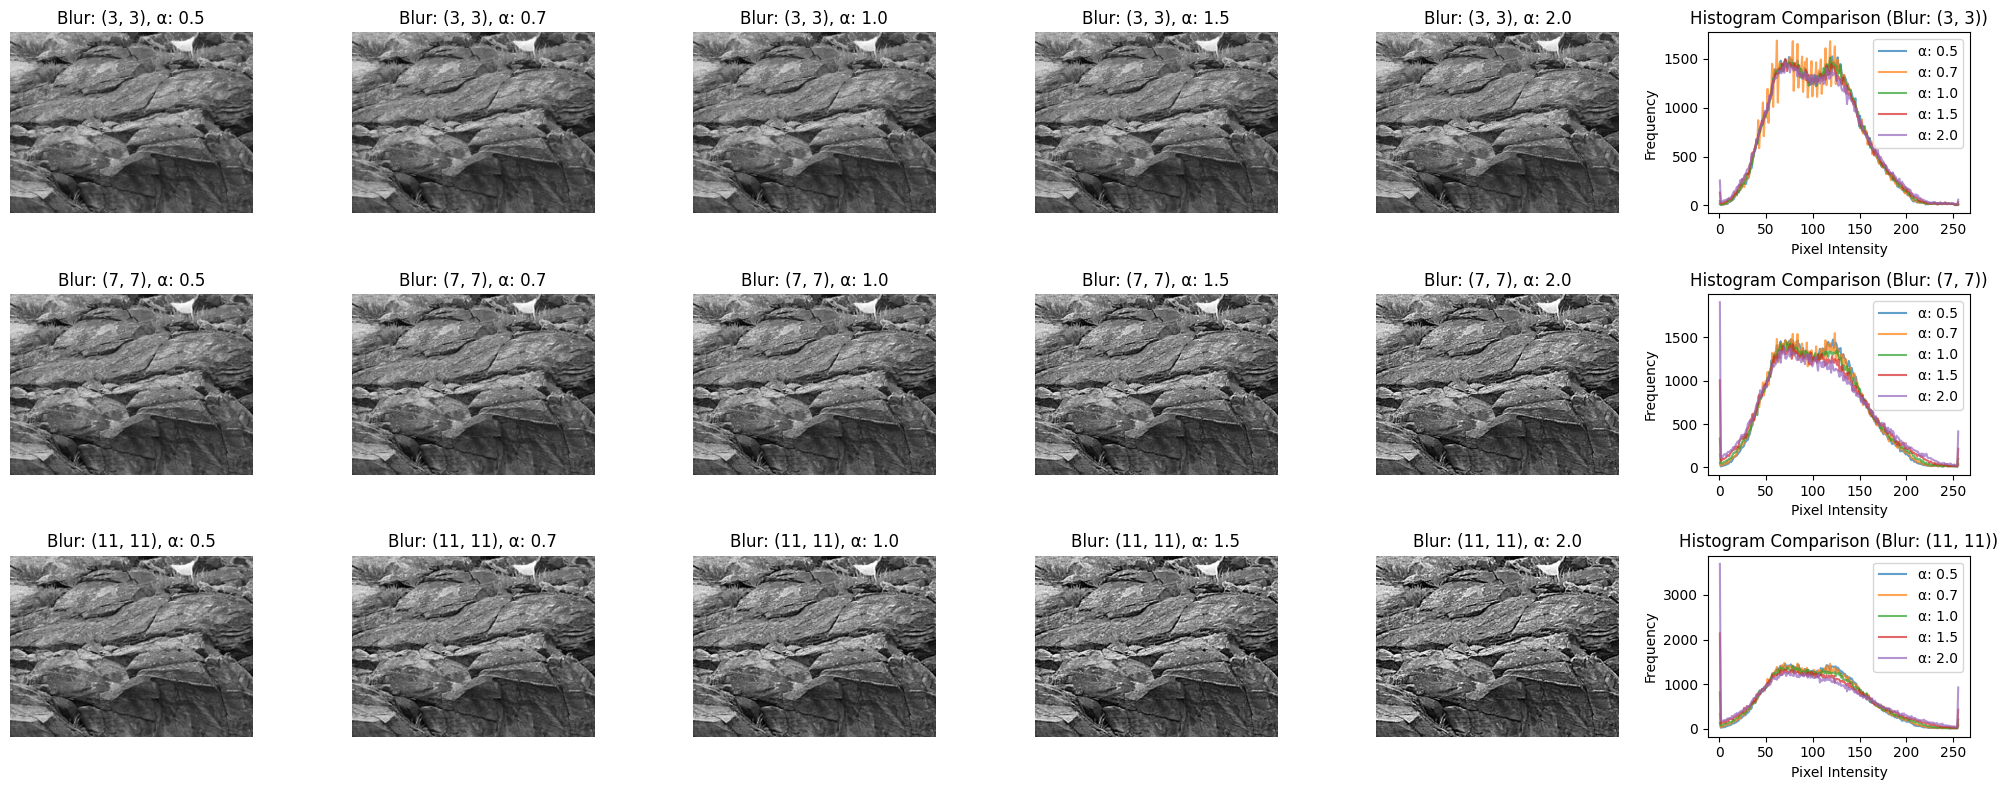

In [1]:
import cv2, numpy as np, matplotlib.pyplot as plt

# 이미지 불러오기
img = cv2.imread('blurred.jpg', cv2.IMREAD_GRAYSCALE)

# 파라미터 설정
blur_sizes = [(3, 3), (7, 7), (11, 11)]  # 다양한 블러링 커널 크기
alpha_values = [0.5, 0.7, 1.0, 1.5, 2.0]  # 다양한 샤프닝 강도

# 플롯 생성
plt.figure(figsize=(20, 8))
plot_idx = 1

for blur_idx, blur_size in enumerate(blur_sizes):
    # 가우시안 블러 적용
    blurred_img = cv2.GaussianBlur(img, blur_size, 0)
    
    # 히스토그램 비교를 위한 데이터 저장
    histograms = []
    
    for alpha_idx, alpha in enumerate(alpha_values):
        # 샤프닝 계산 (NumPy 사용)
        img_sharpened = (1 + alpha) * img - alpha * blurred_img
        
        # 값 클리핑 및 데이터 타입 변환
        img_sharpened = np.clip(img_sharpened, 0, 255).astype(np.uint8)
        
        # 샤프닝 결과 출력
        plt.subplot(len(blur_sizes), len(alpha_values) + 1, plot_idx)
        plt.imshow(img_sharpened, cmap='gray')
        plt.title(f'Blur: {blur_size}, α: {alpha}')
        plt.axis('off')
        plot_idx += 1
        
        # 히스토그램 계산 및 저장
        hist_sharpened, bins = np.histogram(img_sharpened.ravel(), bins=256, range=(0, 256))
        histograms.append((alpha, hist_sharpened))
    pass
    
    # 마지막 열에 히스토그램 비교 플롯
    plt.subplot(len(blur_sizes), len(alpha_values) + 1, plot_idx)
    bins_center = (bins[:-1] + bins[1:]) / 2
    for alpha, hist_sharpened in histograms:
        plt.plot(bins_center, hist_sharpened, label=f'α: {alpha}', alpha=0.7)
    plt.title(f'Histogram Comparison (Blur: {blur_size})')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plot_idx += 1
pass

plt.tight_layout()
plt.show()